<a href="https://colab.research.google.com/github/vigneshwarjayabal/AI_And_Ml/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Definition of Regression**

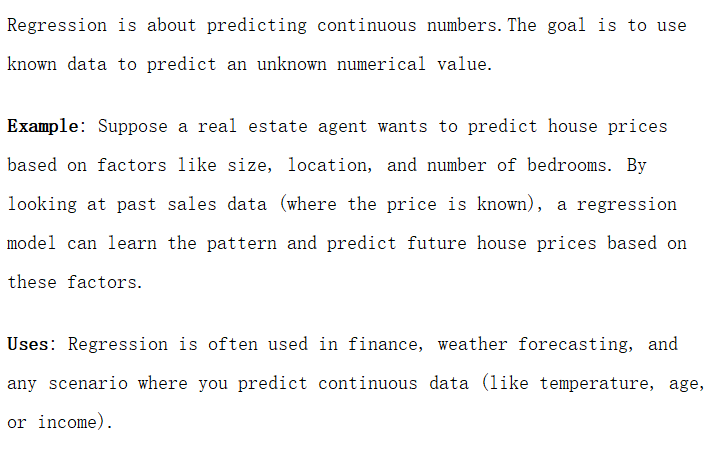

In [ ]:
# Output : The output of a regression model is a continuous
# value. For example, in predicting house prices, the output might
# be a price in dollars.

In [ ]:
# Algorithms : Common regression algorithms include linear
# regression, polynomial regression, decision trees, support
# vector regression (SVR), and various neural network
# architectures.

In [ ]:
#  Evaluation : Regression models are evaluated using metrics
# like mean squared error (MSE), mean absolute error (MAE),
# root mean squared error (RMSE), and R-squared (coefficient of
# determination).

# Loss Function : Mean squared error (MSE) is a widely used
# loss function for training regression models. It measures the
# average squared difference between predicted and actual
# values.

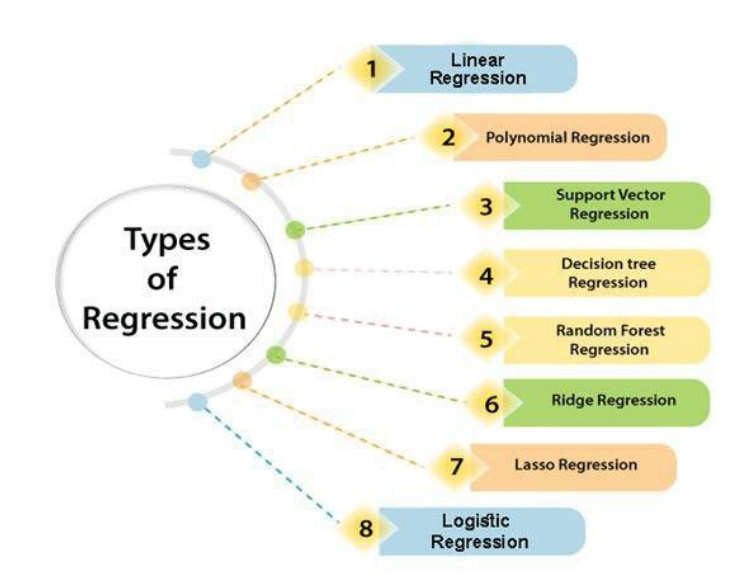

#**Linear Regression**

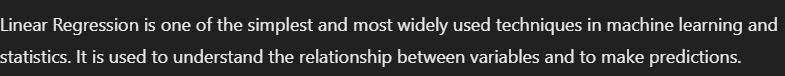

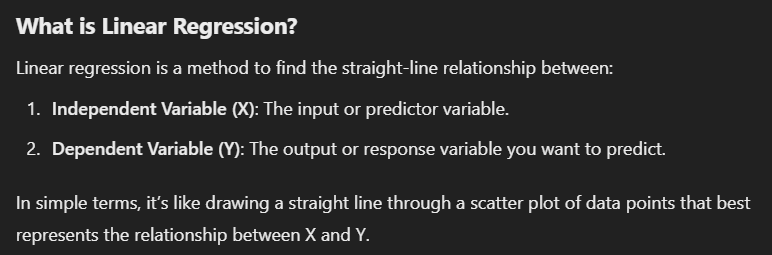

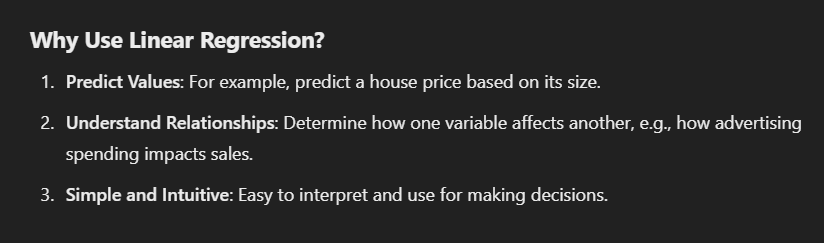

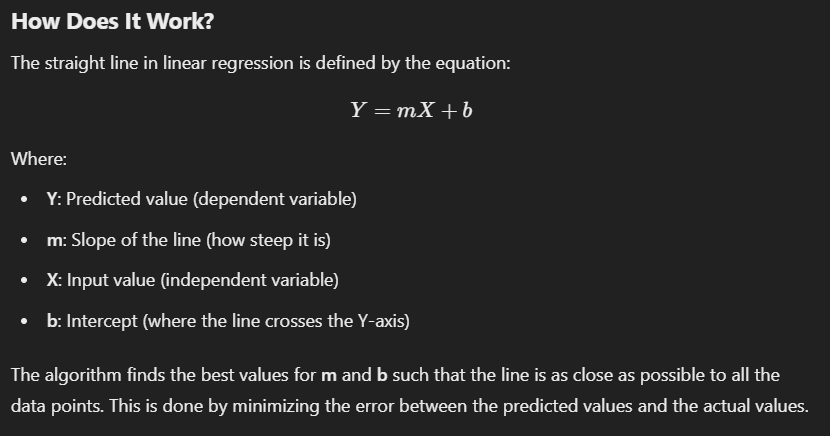

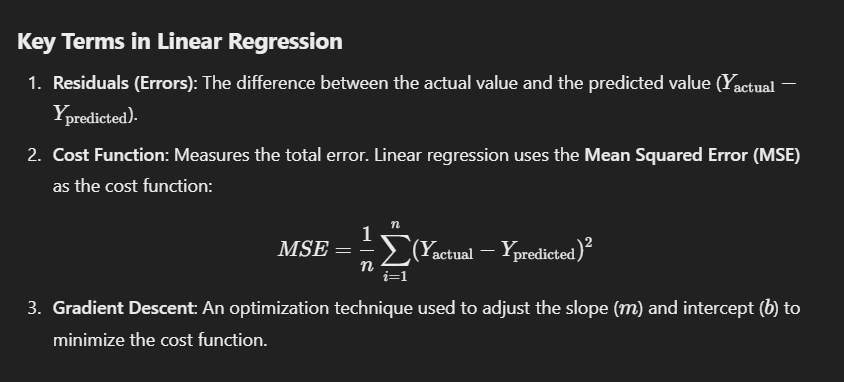

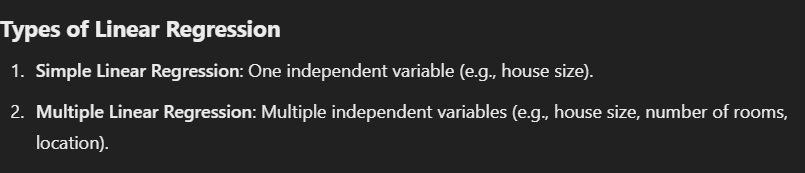

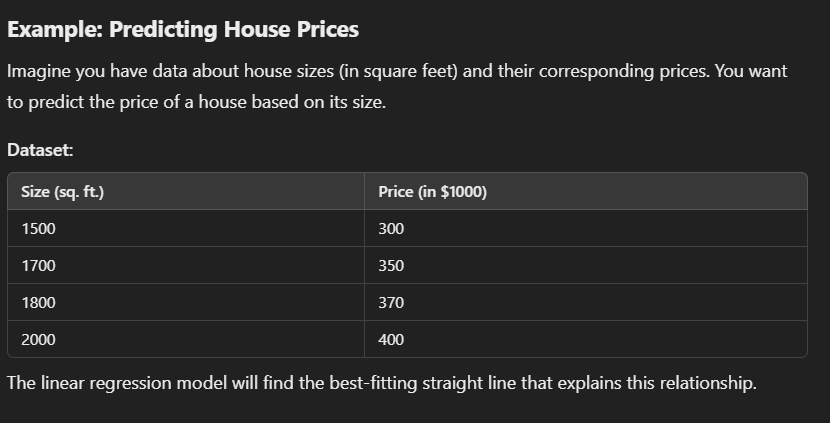

Slope (m): [0.20263158]
Intercept (b): -1.3157894736842195


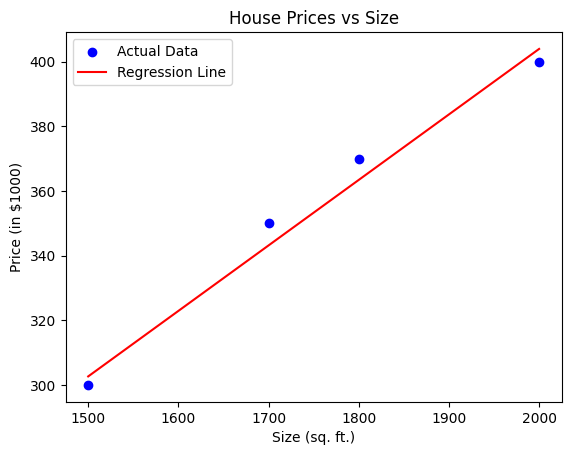

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data: House sizes (X) and Prices (Y)
X = np.array([1500, 1700, 1800, 2000]).reshape(-1, 1)  # Independent variable (house sizes)
Y = np.array([300, 350, 370, 400])  # Dependent variable (house prices)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Create a Linear Regression model and train it
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict house prices
Y_pred = model.predict(X_test)

# Print model parameters
print("Slope (m):", model.coef_)
print("Intercept (b):", model.intercept_)

# Plot the data and the regression line
plt.scatter(X, Y, color='blue', label='Actual Data')  # Actual data points
plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Regression line
plt.title("House Prices vs Size")
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price (in $1000)")
plt.legend()
plt.show()


#**Ordinary Least Squares**

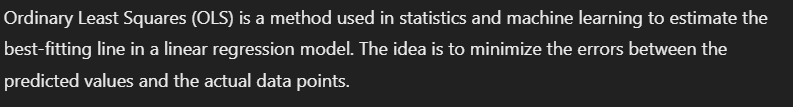

In [ ]:
#1. DAta availability
#2. Defining Independent and dependent variable
#3. Exploring the data(optional)
#4. Matching the data according to the template equation(yhat =B0+B1*X1)
#5. Build a model
#6. Train the data for that model
#7. check sumamry
#8. Explore the result of train model
#9. Identify the best fit model based on the equation

In [ ]:
import pandas as pd

df = pd.read_csv('/content/slr.csv')

df

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:

# x ----> independent variable = Exam
# y ----> Actul dependent variable = GPA
# yhat ----> predicter dependent variable

# yhat = b0 + b1*x1



In [ ]:
x1 = df["Exam"]
y = df['GPA']

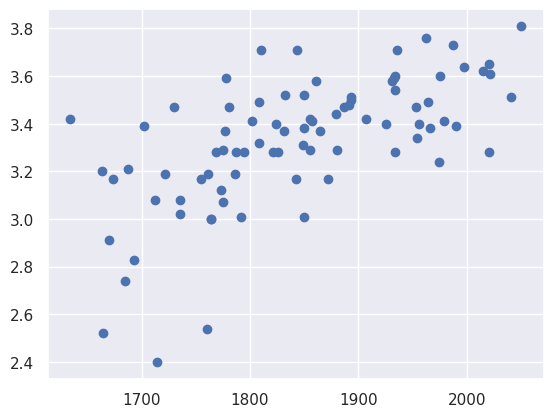

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.scatter(x1,y)
plt.show()

In [ ]:
import statsmodels.api as sm
x= sm.add_constant(x1)
x

,const,Exam
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [ ]:
model = sm.OLS(y,x)

In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           7.20e-11
Time:                        11:16:07   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
Exam           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
yhat=0.2750+(0.0017*x1)

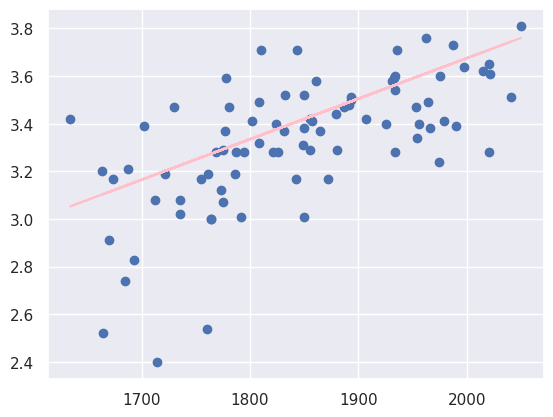

In [ ]:
plt.scatter(x1,y) #step 8
plt.plot(x1,yhat,color="pink")
plt.show()

In [ ]:
yhat1=0.2750+(0.0018*x1)

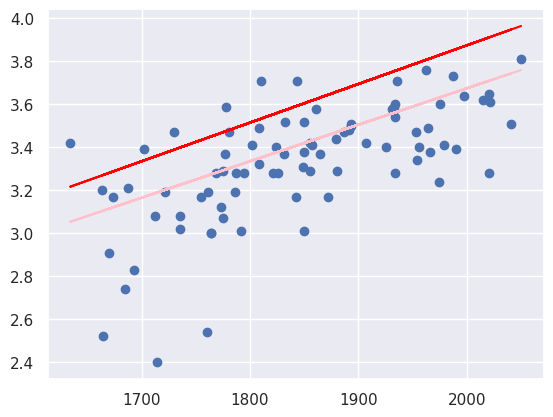

In [ ]:
plt.scatter(x1,y)
plt.plot(x1,yhat,color="pink")
plt.plot(x1,yhat1,color="red")
plt.show()

In [ ]:
result.params

,0
const,0.275040
Exam,0.001656


In [ ]:
result.params[0],result.params[1]

<ipython-input-13-7dc3779c01ea>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],result.params[1]


(0.27504029966028876, 0.0016556880500928112)

In [ ]:
yhat_original=result.params[0]+(result.params[1]*x1)

<ipython-input-14-84eaea24c937>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat_original=result.params[0]+(result.params[1]*x1)


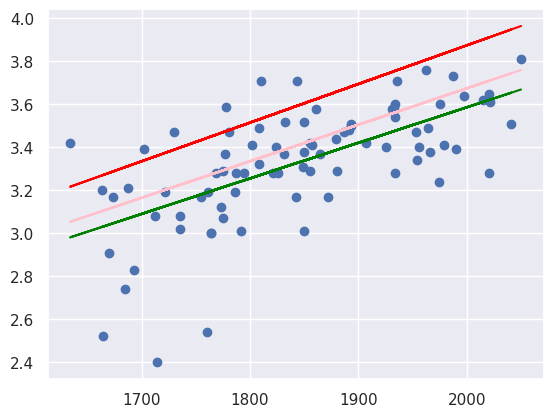

In [ ]:
plt.scatter(x1,y) #step 9
plt.plot(x1,yhat,color="pink")
plt.plot(x1,yhat1,color="red")
plt.plot(x1,yhat_original,color="green")
plt.show()

In [ ]:
# SST/TSS - Sum of squares of Total / Total Sum of Squares:
# ------------------------------
# 1. The difference between the actual point and the mean(average) point.
# 2. We are squaring the result to avoid the negative result.
# 3. To measure the total variability of the data set. (Mathematician perspective)


# SSR/ESS - Sum of Squares of Regression / Explained Sum of Squares:
# ---------------------------------------------------------------------
# 1. The difference between the predicted and the mean.
# 2. To measure the explained variability based on the line(best fit line) (Mathematician perspective)


# SSE/RSS - Sum of Squares of Error / Residual Sum of Squares / Remaining Sum of Squares:
# --------------------------------------------------------------------------
# 1. The difference between the actual and the predicted point.
# 2. To measure the unexplained variability by the equation. (Mathematician perspective)


# # **SST = SSR + SSE**
# - If SSE is too low then it is advisable (more accuracy toward the actual and predict)
#- If SSE is too high then it is not advisable (less accuracy toward the actual and predict)
# - If actual and predictor are same then SSE is zero (theoritically)




#**Explaining SST, SSR, and SSE**

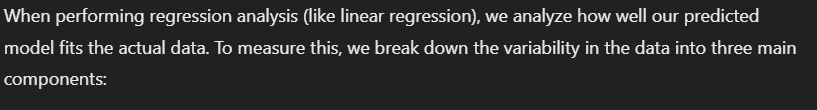

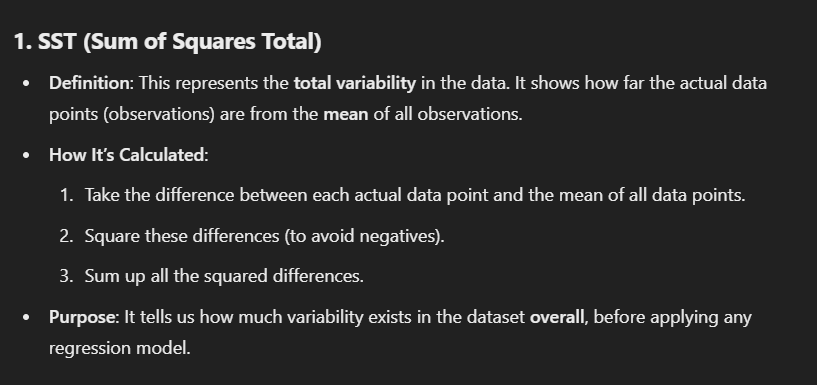

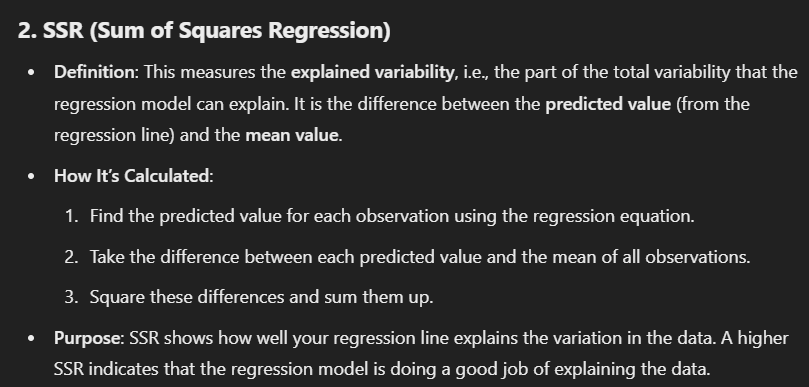

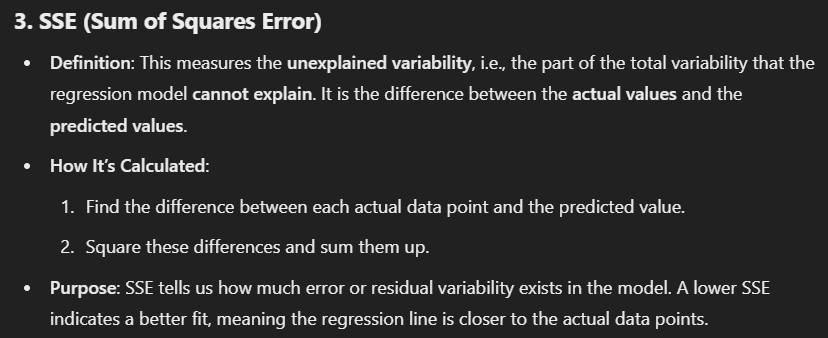

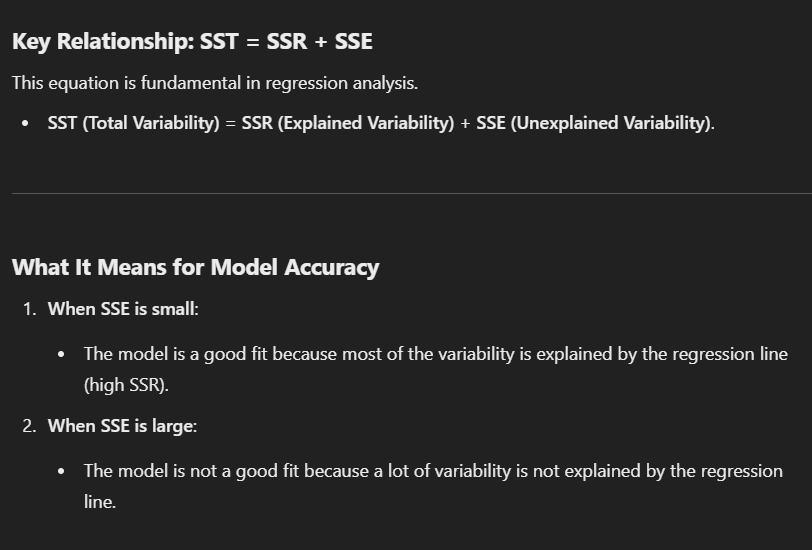

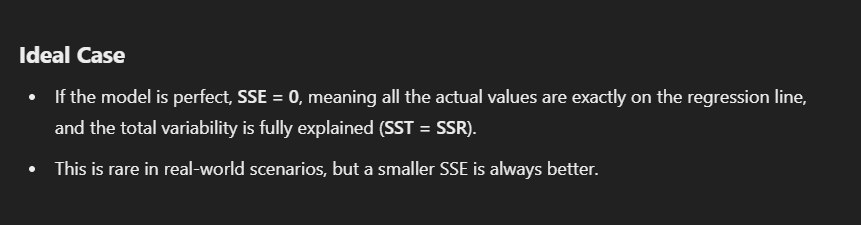

#**logistic regression**

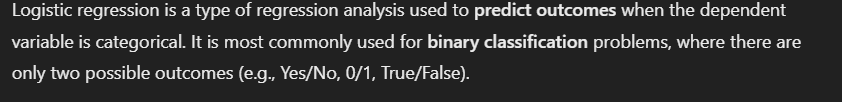

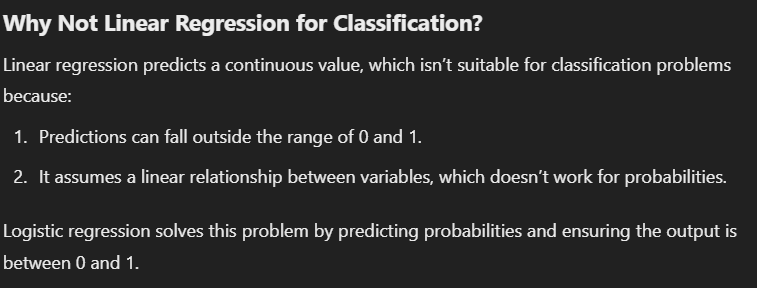

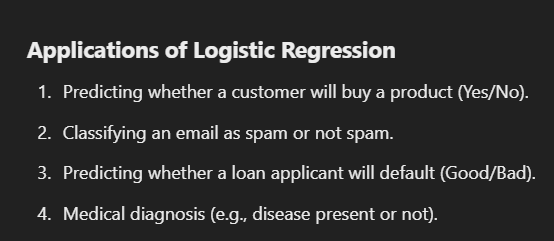

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('/content/Binary predictors.csv')

In [3]:
df

,Marks,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [4]:
#data preprocess converting string to numerical
df["Admitted"]=df["Admitted"].map({"Yes":1,"No":0})
df["Gender"]=df["Gender"].map({"Male":2,"Female":1})

In [5]:
df

,Marks,Admitted,Gender
0,1363,0,2
1,1792,1,1
2,1954,1,1
3,1653,0,2
4,1593,0,2
...,...,...,...
163,1722,1,1
164,1750,1,2
165,1555,0,2
166,1524,0,2


In [6]:
import statsmodels.api as sm

x1=df["Marks"]   #defining independent and dependent variable
y=df["Admitted"]

x=sm.add_constant(x1)  #map to the template

model=sm.Logit(y,x)    #building the model with logit

result=model.fit()      #train the model with our data


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


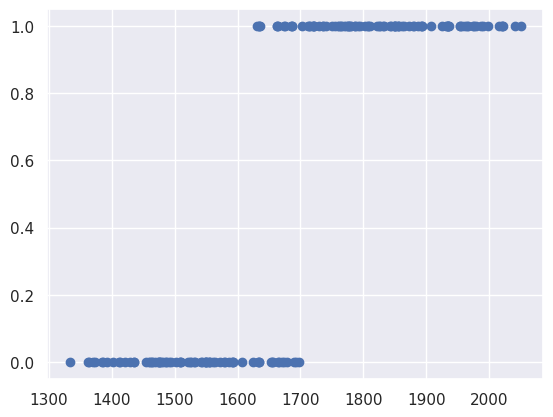

In [8]:
plt.scatter(x1,y)
plt.show()

In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Dec 2024   Pseudo R-squ.:                  0.7992
Time:                        11:21:54   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
Marks          0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
result.params[0],result.params[1]

<ipython-input-10-7dc3779c01ea>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],result.params[1]


(-69.91280217619702, 0.04200486669376753)

In [12]:
import numpy as np

np.exp(result.params[0]+(result.params[1]*1650))/(1+np.exp(result.params[0]+(result.params[1]*1650)))

<ipython-input-12-9367171c7233>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(result.params[0]+(result.params[1]*1650))/(1+np.exp(result.params[0]+(result.params[1]*1650)))


0.3532526657323995

In [13]:
np.exp(result.params[0]+(result.params[1]*1950))/(1+np.exp(result.params[0]+(result.params[1]*1950)))

<ipython-input-13-b70ff9c75fc7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(result.params[0]+(result.params[1]*1950))/(1+np.exp(result.params[0]+(result.params[1]*1950)))


0.9999938354415208

In [14]:
np.exp(result.params[0]+(result.params[1]*1700))/(1+np.exp(result.params[0]+(result.params[1]*1700)))

<ipython-input-14-d83fff88af67>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(result.params[0]+(result.params[1]*1700))/(1+np.exp(result.params[0]+(result.params[1]*1700)))


0.8168980505201828

In [15]:
df["Admitted"].values                 #actual value

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [16]:
result.predict()            #in background it will test and predict y^

array([3.17509804e-06, 9.95320711e-01, 9.99994789e-01, 3.82545559e-01,
       4.74688306e-02, 9.78241219e-01, 9.90489815e-01, 9.99913075e-01,
       9.99932439e-01, 2.80555331e-02, 9.99693576e-01, 9.99883365e-01,
       4.95824098e-01, 3.31130788e-06, 7.68780343e-01, 9.99588875e-01,
       2.11008877e-01, 2.18086901e-01, 2.32751342e-01, 9.99666730e-01,
       9.99998697e-01, 9.99999144e-01, 3.78484857e-05, 1.40058570e-03,
       9.11780281e-01, 9.99878362e-01, 2.18086901e-01, 9.96920696e-01,
       9.99571245e-01, 9.84988046e-01, 1.86723145e-04, 6.09532977e-01,
       4.12717426e-01, 9.99999674e-01, 9.99588875e-01, 9.99781012e-01,
       4.95824098e-01, 9.99836790e-01, 3.92515016e-01, 1.11951035e-05,
       3.72881439e-02, 1.97361936e-01, 9.99986307e-01, 4.26043595e-06,
       9.97797608e-01, 2.70466415e-05, 9.83006220e-01, 3.81272805e-04,
       5.56342322e-04, 1.28281107e-02, 7.78868807e-03, 9.99999908e-01,
       7.97292345e-01, 6.06406209e-03, 9.99987928e-01, 7.99999369e-06,
      

In [18]:
result.pred_table()

array([[67.,  7.],
       [ 7., 87.]])

In [19]:
df["Admitted"].value_counts()

,count
Admitted,
1,94
0,74


In [21]:
cm_df =pd.DataFrame(result.pred_table())  #for understand
cm_df.columns =["predicted 0", "predicted 1"]
cm_df.rename(index = {0:"Actual 0",1:"Actual 1"},inplace = True)
cm_df

,predicted 0,predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


In [22]:
accuracy = (cm_df.iloc[0,0]+cm_df.iloc[1,1])/cm_df.sum().sum()
accuracy

0.9166666666666666

In [23]:
np.exp(-2.0786)

0.12510523698442316

In [24]:
x1=df["Gender"]
y=df['Admitted']
x=sm.add_constant(x1)
model= sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Dec 2024   Pseudo R-squ.:                  0.1659
Time:                        11:29:57   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5137      0.616      5.705      0.000       2.307       4.721
Gender        -2.0786      0.363     -5.727      0.000      -2.790      -1.367
==============================================================================
"""

In [25]:
model.pred_table()

array([[59., 15.],
       [31., 63.]])

In [27]:
cm1_df =pd.DataFrame(model.pred_table())  #for understand
cm1_df.columns =["predicted 0", "predicted 1"]
cm1_df.rename(index = {0:"Actual 0",1:"Actual 1"},inplace = True)
cm1_df

,predicted 0,predicted 1
Actual 0,59.0,15.0
Actual 1,31.0,63.0


In [28]:
#accuracy need to be checked based on correctly predicted/total

#precision need to be checked based on columns wise correctly predicted/total

#recall need to be checked based on row wise correctly predicted/total



In [29]:
precision_0 =  cm1_df.iloc[0,0] /(cm1_df.iloc[0,0]+cm1_df.iloc[1,0])
precision_0

0.6555555555555556

In [30]:
precision_1 =  cm1_df.iloc[1,1] /(cm1_df.iloc[0,1]+cm1_df.iloc[1,1])
precision_1

0.8076923076923077

In [31]:
recall_0 =  cm1_df.iloc[0,0] /(cm1_df.iloc[0,0]+cm1_df.iloc[0,1])
recall_0

0.7972972972972973

In [32]:
recall_1=  cm1_df.iloc[1,1] /(cm1_df.iloc[1,0]+cm1_df.iloc[1,1])
recall_1

0.6702127659574468

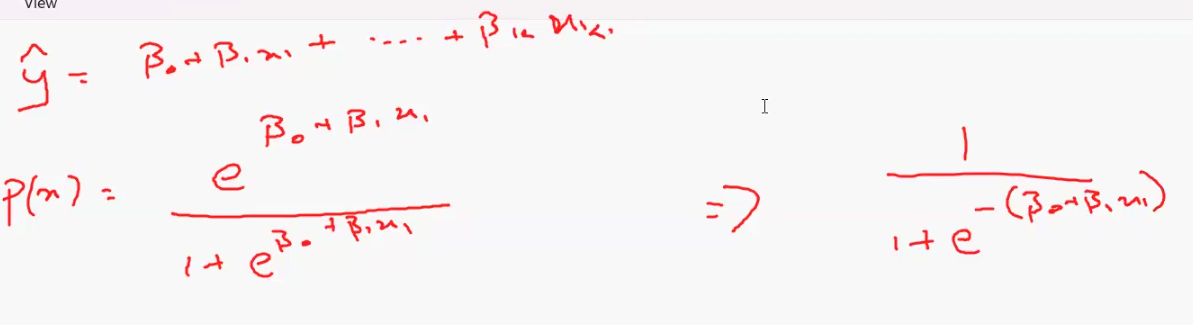

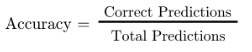

#**Confusion Matrix and other evalution metrics**

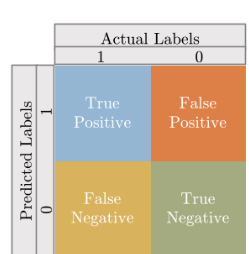

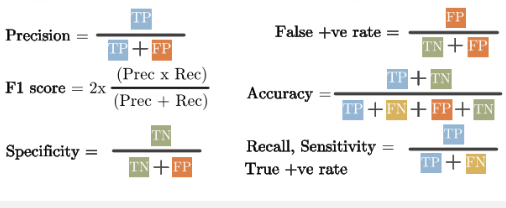

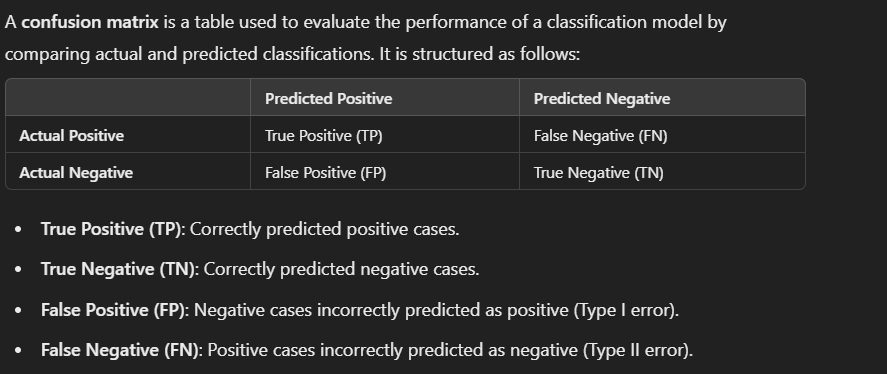

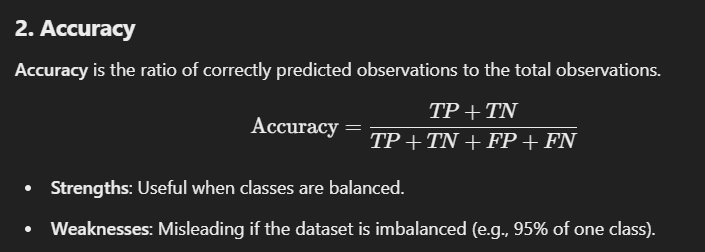

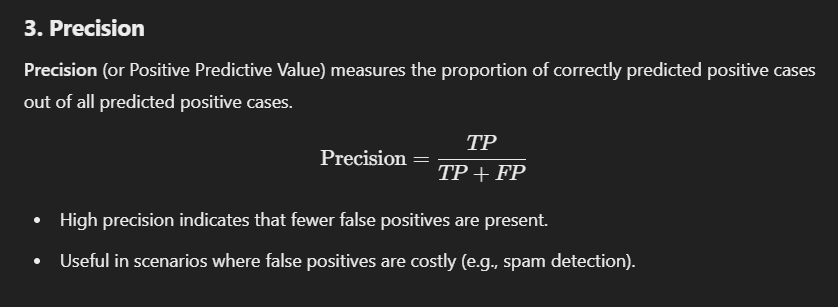

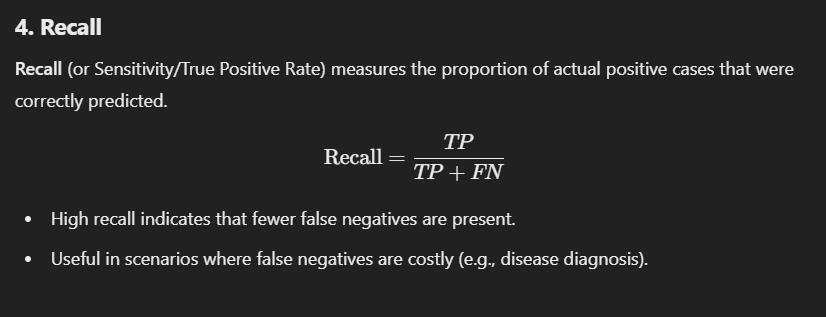

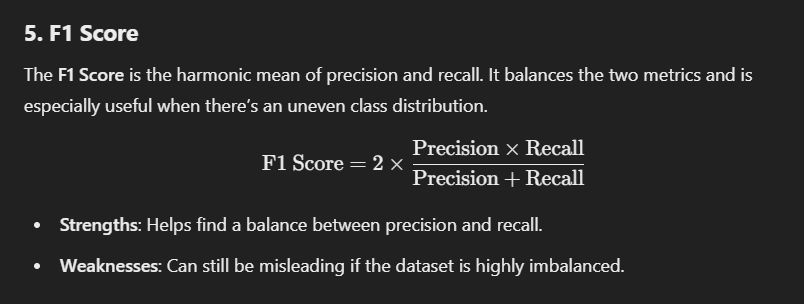

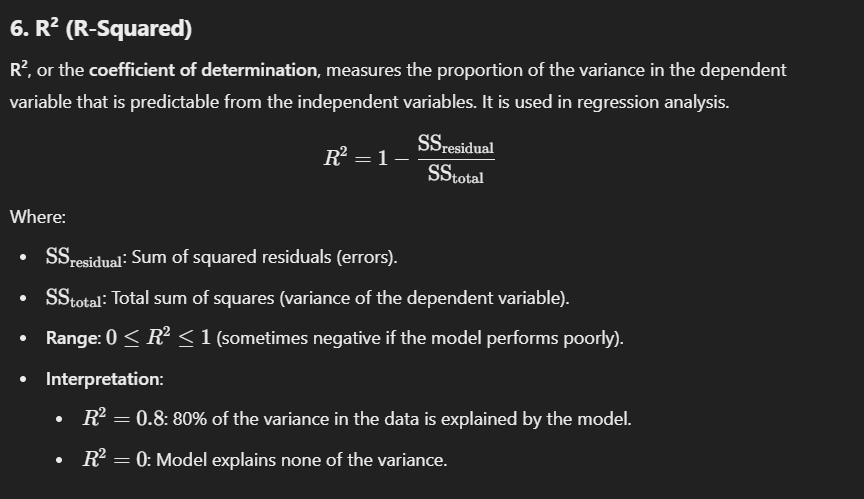

#**Odds Ratio**

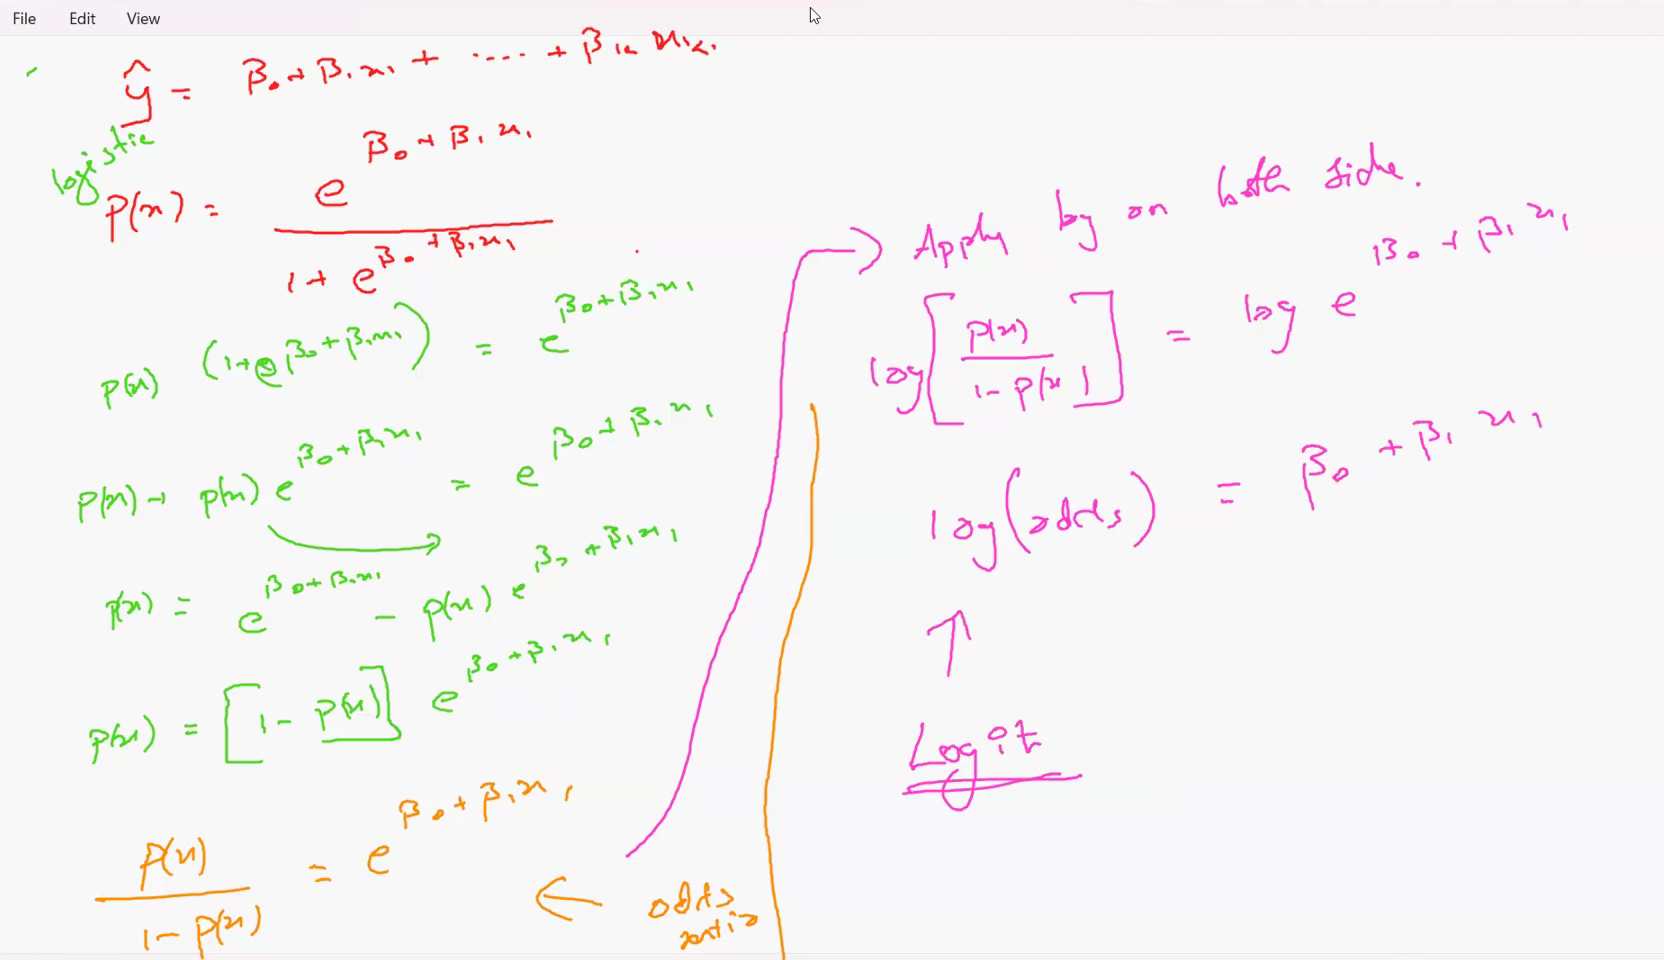

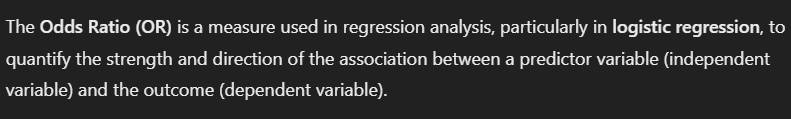

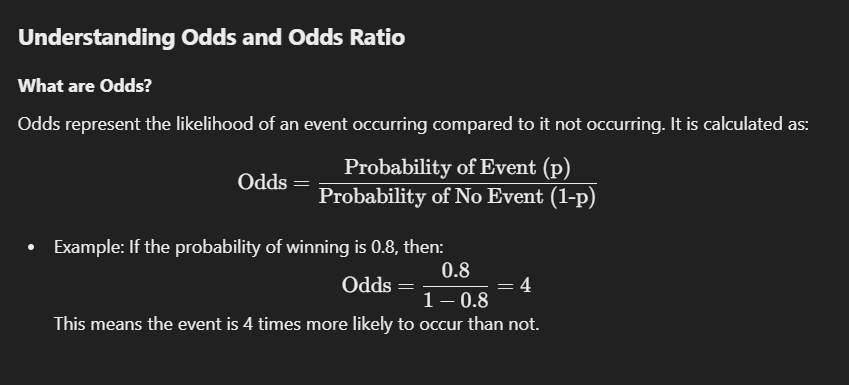

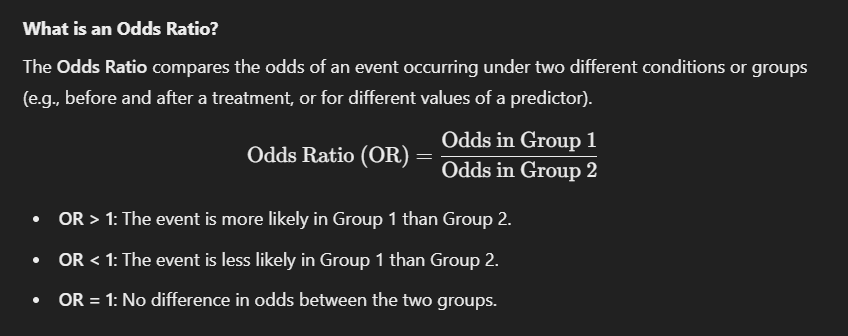

In [ ]:
# odds ratio = ratio between success to the failure.

#**Why linear Regression is not suitable for Classification problems**

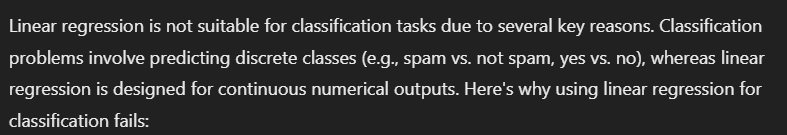

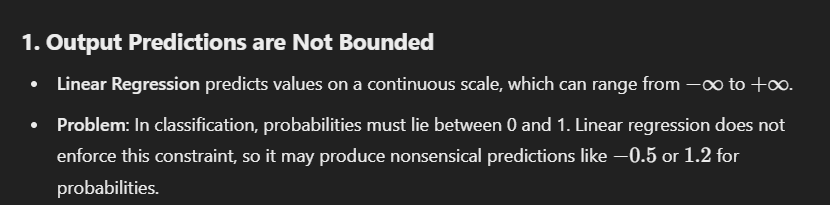

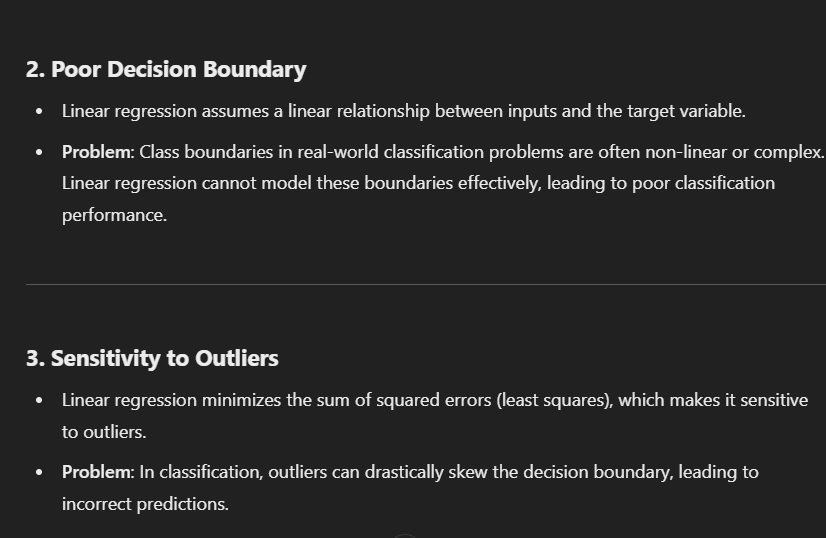

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df=pd.read_csv("/content/Binary predictors.csv")

In [4]:
#data preprocess converting string to numerical
df["Admitted"]=df["Admitted"].map({"Yes":1,"No":0})
df["Gender"]=df["Gender"].map({"Male":2,"Female":1})

In [5]:
sns.set()

<ipython-input-6-40ef33690b06>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat=result.params[0]+result.params[1]*x1


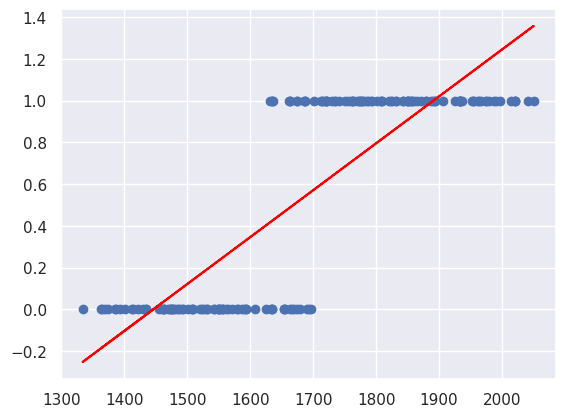

In [6]:
x1=df["Marks"]                         #continous-regression ,category-clasification
y=df["Admitted"]
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
yhat=result.params[0]+result.params[1]*x1
plt.scatter(x1,y)
plt.plot(x1,yhat,color="red")
plt.show()

In [7]:
x1=df["Marks"]
y=df["Admitted"]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<ipython-input-8-c385eeaa4a26>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat=np.sort(myfun(x1,result_log.params[0],result_log.params[1]))
<ipython-input-8-c385eeaa4a26>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat=np.sort(myfun(x1,result_log.params[0],result_log.params[1]))


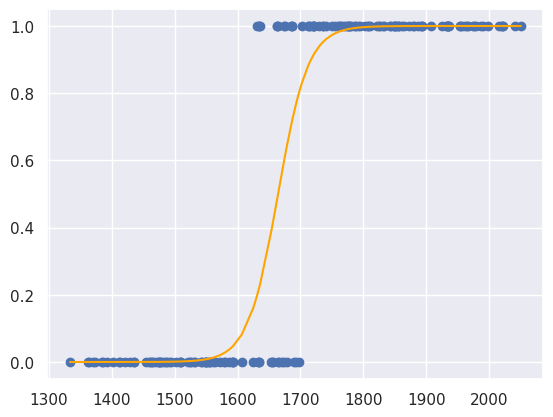

In [8]:
def myfun(x,b0,b1):
  return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))                       #for 0 and 1 best fit is logistic regression

yhat=np.sort(myfun(x1,result_log.params[0],result_log.params[1]))
x_=np.sort(np.array(x1))
yhat=np.sort(myfun(x1,result_log.params[0],result_log.params[1]))
x_=np.sort(np.array(x1))
plt.scatter(x1,y)
plt.plot(x_,yhat, color="orange")
plt.show()

In [9]:
import plotly.express as px

In [10]:
df=pd.read_csv("/content/Binary predictors.csv")
px.scatter(df,x="Marks",y="Admitted",color="Gender")

In [11]:
#data preprocess converting string to numerical
df["Admitted"]=df["Admitted"].map({"Yes":1,"No":0})
df["Gender"]=df["Gender"].map({"Male":2,"Female":1})

In [12]:
x1=df[["Marks","Gender"]]
y=df["Admitted"]
x=sm.add_constant(x1)
result=sm.Logit(y,x).fit()
result.pred_table()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


array([[69.,  5.],
       [ 4., 90.]])

In [13]:
x

,const,Marks,Gender
0,1.0,1363,2
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,2
4,1.0,1593,2
...,...,...,...
163,1.0,1722,1
164,1.0,1750,2
165,1.0,1555,2
166,1.0,1524,2
